In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/FDM MINI PROJECT/Feature Engineering/final.csv"
DF = pd.read_csv(path)
DF.head(10)


lead_time  is_same_room  previous_cancellations  total_of_special_requests  \
0   0.009539             1                       0                          0   
1   0.139905             1                       0                          1   
2   0.103339             1                       0                          1   
3   0.146264             1                       0                          2   
4   0.158983             1                       0                          1   
5   0.125596             1                       0                          1   
6   0.004769             1                       0                          0   
7   0.100159             1                       0                          0   
8   0.098569             1                       0                          1   
9   0.098569             1                       0                          1   

   booking_changes  is_cancelled  
0                0             0  
1                0             1  
2                0             1  
3                0             1  
4                0             1  
5                0             1  
6                1             0  
7                0             1  
8                0             1  
9                0             1

In [ ]:
DF.shape

(79330, 6)

In [ ]:
# check distribution of target_class column
DF['is_cancelled'].value_counts()

# view the percentage distribution of target_class column
DF['is_cancelled'].value_counts()/np.float(len(DF))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


0    0.58273
1    0.41727
Name: is_cancelled, dtype: float64

In [ ]:
X = DF.drop(['is_cancelled'], axis=1)
Y = DF['is_cancelled']
#sns.pairplot(DF, hue="is_canceled",palette="bright")

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((55531, 5), (23799, 5))

In [ ]:
# check the shape of X_train and X_test
Y_train.shape, Y_test.shape

((55531,), (23799,))

In [ ]:
# Import SVC classifier
from sklearn.svm import SVC
# Import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# Instantiate classifier with default hyperparameters
svc=SVC() 
# Fit classifier to training set
svc.fit(X_train,Y_train)
# Make predictions on test set
Y_pred=svc.predict(X_test)
# Compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with default hyperparameters: 0.7541


In [ ]:
# Instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 
# Fit classifier to training set
svc.fit(X_train,Y_train)
# Make predictions on test set
Y_pred=svc.predict(X_test)
# Compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.7626


In [ ]:
# Instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 
# Fit classifier to training set
svc.fit(X_train,Y_train)
# Make predictions on test set
Y_pred=svc.predict(X_test)
# Compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.7661


In [ ]:
# Instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 
# Fit classifier to training set
linear_svc.fit(X_train,Y_train)
# Make predictions on test set
Y_pred_test=linear_svc.predict(X_test)
# Compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.7424


In [ ]:
# Instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 
# Fit classifier to training set
linear_svc100.fit(X_train, Y_train)
# Make predictions on test set
Y_pred=linear_svc100.predict(X_test)
# Compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.7422


In [ ]:
# Instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 
# Fit classifier to training set
linear_svc1000.fit(X_train, Y_train)
# Make predictions on test set
Y_pred=linear_svc1000.predict(X_test)
# Compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.7421


In [ ]:
Y_pred_train = linear_svc.predict(X_train)
Y_pred_train

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train)))

Training-set accuracy score: 0.7454


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, Y_test)))

Training set score: 0.7454
Test set score: 0.7424


In [ ]:
# check class distribution in test set
Y_test.value_counts()

0    14000
1     9799
Name: is_cancelled, dtype: int64

In [ ]:
# check null accuracy score
null_accuracy = (3306/(3306+274))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 
# fit classifier to training set
poly_svc.fit(X_train,Y_train)
# make predictions on test set
Y_pred=poly_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7481


In [ ]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 
# fit classifier to training set
poly_svc100.fit(X_train, Y_train)
# make predictions on test set
Y_pred=poly_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.7524


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 
# fit classifier to training set
sigmoid_svc.fit(X_train,Y_train)
# make predictions on test set
Y_pred=sigmoid_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.6794


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 
# fit classifier to training set
sigmoid_svc100.fit(X_train,Y_train)
# make predictions on test set
Y_pred=sigmoid_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.6457


In [ ]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[11468  2532]
 [ 3599  6200]]

True Positives(TP) =  11468

True Negatives(TN) =  6200

False Positives(FP) =  2532

False Negatives(FN) =  3599


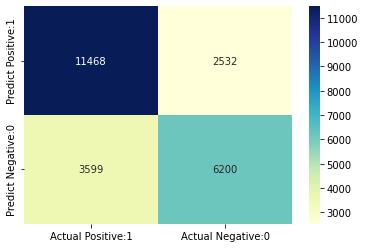

In [ ]:
# visualize confusion matrix with seaborn heatma
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79     14000
           1       0.71      0.63      0.67      9799

    accuracy                           0.74     23799
   macro avg       0.74      0.73      0.73     23799
weighted avg       0.74      0.74      0.74     23799



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7424


In [ ]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2576


In [ ]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8191


In [ ]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.7611


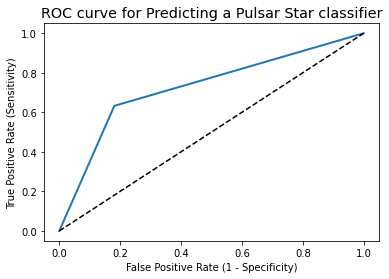

In [ ]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_test)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a Pulsar Star classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(Y_test, Y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7259
